# TF OpenPose Notebook

This is a jupyter-notebook implementation of the tf-pose-estimation/run.py script.

In [1]:
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [2]:
logger = logging.getLogger('TfPoseEstimator')
logger.handlers.clear()
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

In [3]:
def main(argString='--image ./images/contortion1.jpg --model cmu',repeats=10):
    parser = argparse.ArgumentParser(description='tf-pose-estimation run')
    parser.add_argument('--image', type=str, default='./images/apink2.jpg')
    parser.add_argument('--model', type=str, default='cmu',
                        help='cmu / mobilenet_thin / mobilenet_v2_large / mobilenet_v2_small')
    parser.add_argument('--resize', type=str, default='0x0',
                        help='if provided, resize images before they are processed. '
                             'default=0x0, Recommends : 432x368 or 656x368 or 1312x736 ')
    parser.add_argument('--resize-out-ratio', type=float, default=2.0,
                        help='if provided, resize heatmaps before they are post-processed. default=1.0')

    #argString = '--image ./images/contortion1.jpg --resize 328x184 --model cmu'
    args = parser.parse_args(argString.split())

    w, h = model_wh(args.resize)
    if w == 0 or h == 0:
        e = TfPoseEstimator(get_graph_path(args.model), target_size=(432, 368))
    else:
        e = TfPoseEstimator(get_graph_path(args.model), target_size=(w, h))

    # estimate human poses from a single image !
    image = common.read_imgfile(args.image, None, None)
    if image is None:
        logger.error('Image can not be read, path=%s' % args.image)
        sys.exit(-1)

    t = time.time()
    for _ in range(repeats):
        humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=args.resize_out_ratio)
    elapsed = time.time() - t

    logger.info('%d times inference on image: %s at %.4f seconds/image.' % (repeats, args.image, elapsed/repeats))

    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    return image, e

In [4]:
def plotter(image):
    try:
        import matplotlib.pyplot as plt

        fig = plt.figure(figsize=(12,12))
        a = fig.add_subplot(1, 1, 1)
        a.set_title('Result')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
    except Exception as e:
        logger.warning('matplitlib error, %s' % e)
        cv2.imshow('result', image)
        cv2.waitKey()


In [5]:
strArgs1 = '--model mobilenet_v2_large --resize 656x368 --image=./images/ski.jpg --resize-out-ratio 2.0'
strArgs2 = '--model inf --resize 656x368 --image=./images/ski.jpg --resize-out-ratio 2.0'
strArgs3 = '--model cmu --resize 656x368 --image=./images/ski.jpg --resize-out-ratio 2.0'
strArgs4 = '--model inf --resize 328x184 --image=./images/ski.jpg --resize-out-ratio 2.0'
strArgs5 = '--model cmu --resize 328x184 --image=./images/ski.jpg --resize-out-ratio 2.0'
img, e = main(strArgs2)

[2020-07-17 01:20:24,650] [TfPoseEstimator] [INFO] loading graph from /home/ubuntu/openpose/tf-pose-estimation/models/graph/inf/graph_opt.pb(default size=656x368)
2020-07-17 01:20:24,650 INFO loading graph from /home/ubuntu/openpose/tf-pose-estimation/models/graph/inf/graph_opt.pb(default size=656x368)


2020-07-17 01:20:24,651 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:311: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



2020-07-17 01:20:24,652 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:312: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



2020-07-17 01:20:24,870 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:330: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2020-07-17 01:20:25,228 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:332: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



TfPoseEstimator/preprocess_subtract/y
TfPoseEstimator/preprocess_divide/y
TfPoseEstimator/image
TfPoseEstimator/preprocess_subtract/perm
TfPoseEstimator/preprocess_divide
TfPoseEstimator/preprocess_subtract_PreTransposeNHWC2NCHW
TfPoseEstimator/preprocess_subtract_PreCastFloat32ToFlot16
TfPoseEstimator/preprocess_subtract
TfPoseEstimator/conv5_2_CPM_L1/weights/neuron_op_ed41d2deb8c54255
TfPoseEstimator/Openpose/concat_stage7



2020-07-17 01:20:25,477 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:341: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2020-07-17 01:20:25,478 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:342: The name tf.image.resize_area is deprecated. Please use tf.compat.v1.image.resize_area instead.



2020-07-17 01:20:25,483 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/tensblur/smoother.py:96: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-07-17 01:20:25,490 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:354: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-07-17 01:20:25,492 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:359: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



2020-07-17 01:20:25,492 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:360: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



2020-07-17 01:20:25,493 WARNING From /home/ubuntu/openpose/tf-pose-estimation/tf_pose/estimator.py:362: The name tf.report_uninitialized_variables is deprecated. Please use tf.compat.v1.report_uninitialized_variables instead.

[2020-07-17 01:20:28,915] [TfPoseEstimator] [DEBUG] inference+ original shape=712x674
2020-07-17 01:20:28,915 DEBUG inference+ original shape=712x674
[2020-07-17 01:20:28,984] [TfPoseEstimator] [DEBUG] estimate Session time=0.06686
2020-07-17 01:20:28,984 DEBUG estimate Session time=0.06686
[2020-07-17 01:20:28,985] [TfPoseEstimator] [DEBUG] inference- heatMat=164x92 pafMat=164x92
2020-07-17 01:20:28,985 DEBUG inference- heatMat=164x92 pafMat=164x92
[2020-07-17 01:20:28,987] [TfPoseEstimator] [DEBUG] estimate PAF time=0.00095
2020-07-17 01:20:28,987 DEBUG estimate PAF time=0.00095
[2020-07-17 01:20:28,987] [TfPoseEstimator] [DEBUG] inference+ original shape=712x674
2020-07-17 01:20:28,987 DEBUG inference+ original shape=712x674
[2020-07-17 01:20:29,056] [TfPoseEs

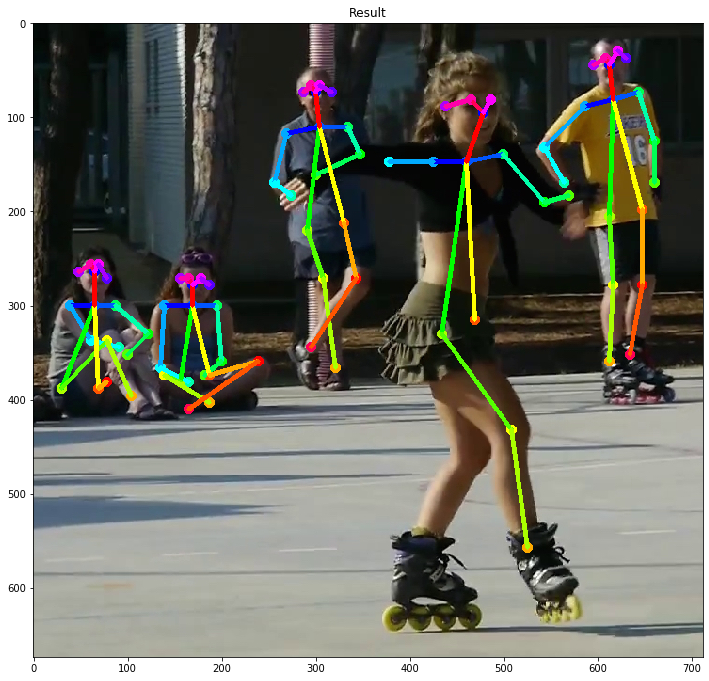

In [6]:
plotter(img)